<a href="https://colab.research.google.com/github/InsightByHarshit/IMDB-Data-Analysis/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv('Copy of imdb_data.csv')


The **info()** method in a pandas DataFrame provides a concise summary of the DataFrame's structure. It is particularly useful for quickly understanding the data's size, data types, and missing values.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In pandas, the **dtypes** attribute of a DataFrame shows the data types of each column. These data types are critical because they determine how operations are performed on the data in that column.

In [4]:
print("Data types of each column:\n", data.dtypes)


Data types of each column:
 id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object


**isnull().sum()** is a concise way to check for missing (null) values in a pandas DataFrame or Series.

In [5]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


When working with a pandas DataFrame, **columns** refer to the vertical structures that hold data for a specific feature or attribute. Each column has a name (or label) and contains data of a specific type.

In [6]:
print(data.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


The **.describe()** method in pandas is used to compute summary statistics for numerical columns in your dataset

In [7]:
print(data.describe())

                id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09


Converting columns to the **datetime** type in pandas is important because it allows for more efficient handling and manipulation of date and time-related data.

In [8]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
print("Data types after conversion:\n", data.dtypes)

Data types after conversion:
 id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
Keywords                         object
cast                             object
crew                             object
revenue                           int64
dtype: object


<ipython-input-8-50b593a75347>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


The **.nunique()** method in pandas is used to count the number of unique values in a column or across an entire DataFrame.

In [9]:
unique_genres = data['genres'].nunique()
unique_languages = data['original_language'].nunique()
unique_status = data['status'].nunique()
print(f"Unique genres: {unique_genres}, Unique languages: {unique_languages}, Unique status: {unique_status}")


Unique genres: 872, Unique languages: 36, Unique status: 2


In [10]:
top_expensive_movies = data[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
print("Top 10 most expensive movies:\n", top_expensive_movies)


Top 10 most expensive movies:
                                             title     budget
2135  Pirates of the Caribbean: On Stranger Tides  380000000
2209     Pirates of the Caribbean: At World's End  300000000
2770                      Avengers: Age of Ultron  280000000
1425                             Superman Returns  270000000
1270                                  John Carter  260000000
1630                Transformers: The Last Knight  260000000
2532            The Hobbit: An Unexpected Journey  250000000
961        Harry Potter and the Half-Blood Prince  250000000
906                         The Dark Knight Rises  250000000
666           The Hobbit: The Desolation of Smaug  250000000


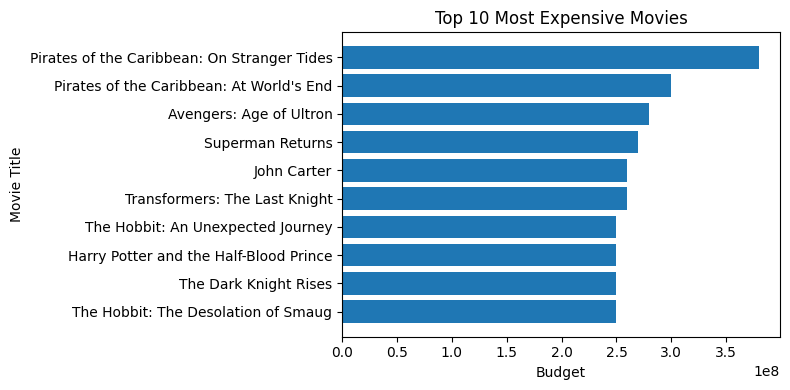

In [14]:
import matplotlib.pyplot as plt

# Assuming 'top_expensive_movies' DataFrame is already created
# ... (previous code to find top 10 expensive movies)

plt.figure(figsize=(8, 4))  # Adjust figure size if needed
plt.barh(top_expensive_movies['title'], top_expensive_movies['budget'])
plt.xlabel("Budget")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Expensive Movies")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Assuming your DataFrame is named 'data' and has a 'release_date' column
data['release_year'] = pd.to_datetime(data['release_date'], errors='coerce').dt.year

# Display the DataFrame with the new 'release_year' column
print(data[['title', 'release_date', 'release_year']])

                                         title release_date  release_year
0                       Hot Tub Time Machine 2   2015-02-20          2015
1     The Princess Diaries 2: Royal Engagement   2004-08-06          2004
2                                     Whiplash   2014-10-10          2014
3                                      Kahaani   2012-03-09          2012
4                                   Marine Boy   2009-02-05          2009
...                                        ...          ...           ...
2995                                   Chasers   1994-04-22          1994
2996                          We Are the Best!   2013-03-28          2013
2997                   The Long Kiss Goodnight   1996-10-11          1996
2998                          Along Came Polly   2004-01-16          2004
2999                                 Abduction   2011-09-22          2011

[3000 rows x 3 columns]


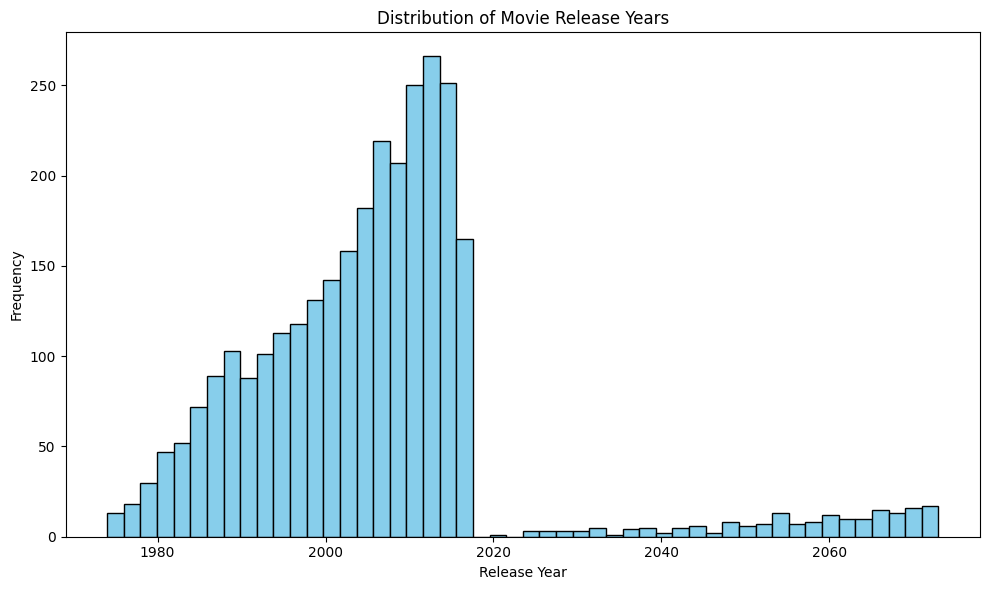

In [22]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'release_year' column
# ... (previous code)

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(data['release_year'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [23]:
status_counts = data['status'].value_counts()
print("Movies by status:\n", status_counts)

Movies by status:
 status
Released    2996
Rumored        4
Name: count, dtype: int64


In [26]:
top_popular_movies = data[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
print("Top 10 most popular movies:\n", top_popular_movies)


Top 10 most popular movies:
                                title  popularity
518                     Wonder Woman  294.337037
684             Beauty and the Beast  287.253654
1695                     Baby Driver  228.032744
2326                        Deadpool  187.860492
2126  Guardians of the Galaxy Vol. 2  185.330992
1309                       Gone Girl  154.801009
1715  War for the Planet of the Apes  146.161786
1673                 The Dark Knight  123.167259
1126                    The Avengers   89.887648
2293                      The Circle   88.439243


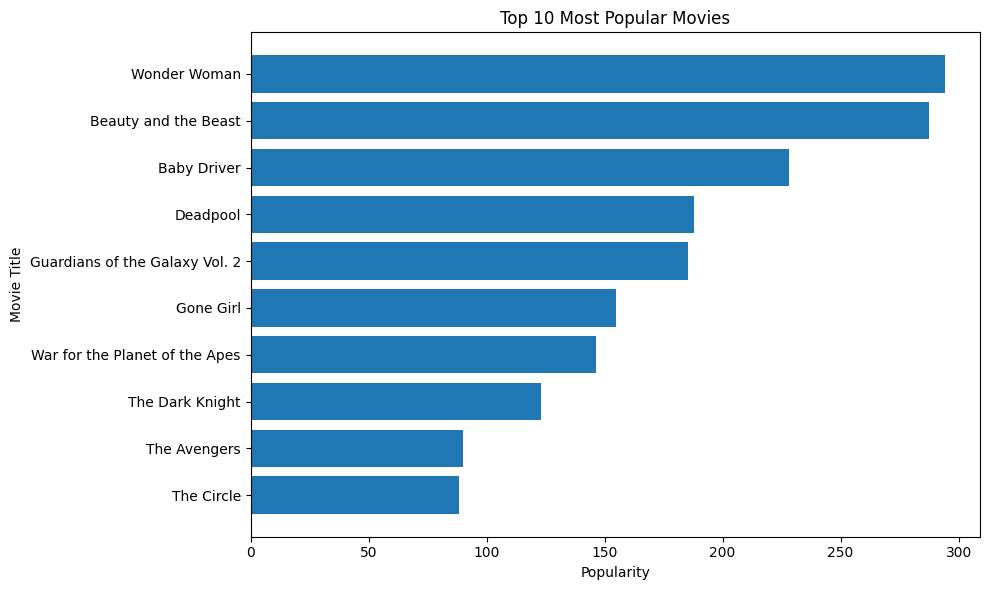

In [27]:
import matplotlib.pyplot as plt

# Assuming you have already calculated top_popular_movies
# ... (previous code)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.barh(top_popular_movies['title'], top_popular_movies['popularity'])
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Invert y-axis to display top movie at the top
plt.tight_layout()
plt.show()

Scatter plot to analyze the relationship between budget and revenue.

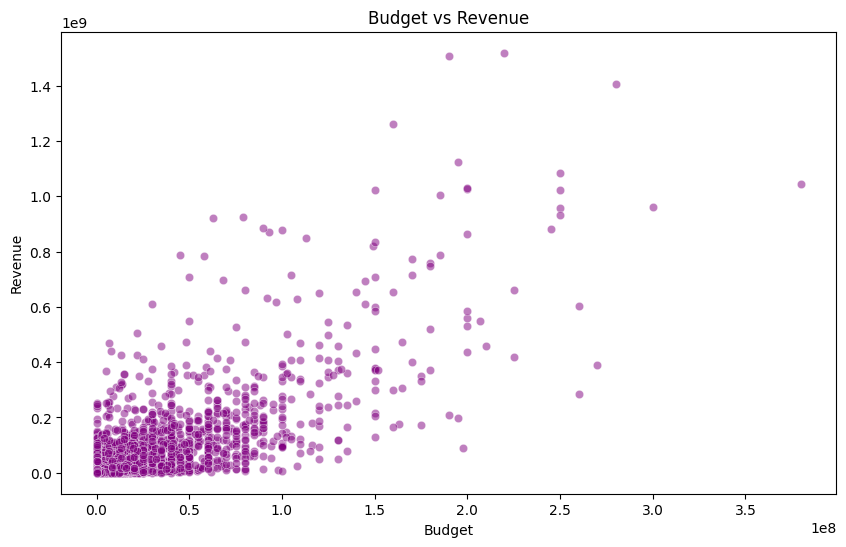

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data, alpha=0.5, color='purple')
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


Analyze the correlation between numerical variables.

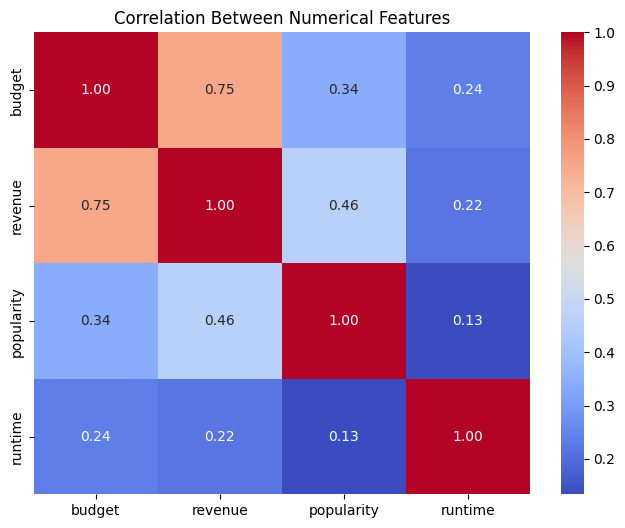

In [33]:
correlation_matrix = data[['budget', 'revenue', 'popularity', 'runtime']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numerical Features")
plt.show()


Movies by Language

In [37]:
data['original_language'].value_counts()

,count
original_language,
en,2575
fr,78
ru,47
es,43
hi,42
ja,37
it,24
cn,20
ko,20


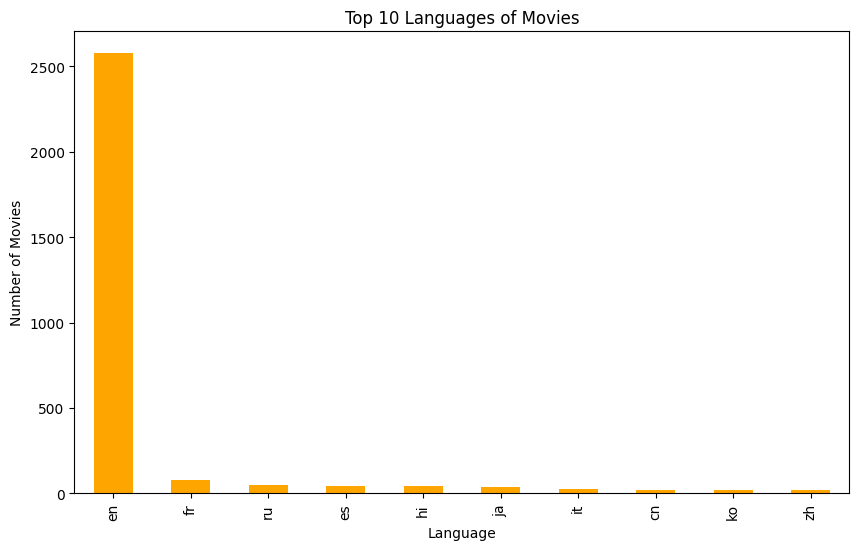

In [38]:
language_counts = data['original_language'].value_counts()

plt.figure(figsize=(10, 6))
language_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Languages of Movies")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.show()


Status of Movies

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

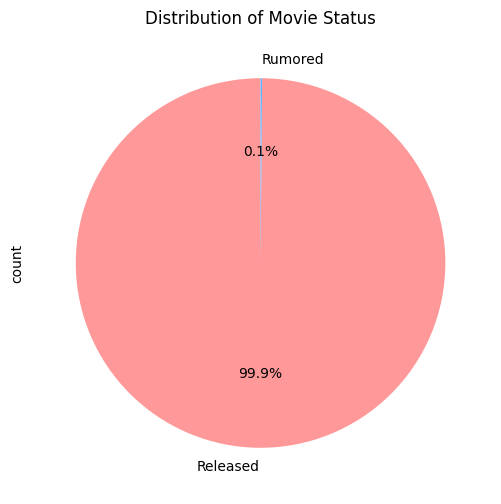

In [39]:
status_counts = data['status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Distribution of Movie Status")
plt.ylabel
